## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [50]:
import pandas as pd

In [51]:
advertising = pd.read_csv("tvmarketing.csv")

Now, let's check the structure of the advertising dataset.

In [52]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [53]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [54]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [55]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [56]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Seaborn

In [57]:
import warnings 
warnings.filterwarnings('ignore')

In [58]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

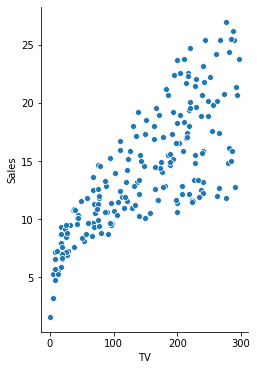

In [59]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales',size=5, aspect=0.7, kind='scatter')


In [60]:
advertising.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


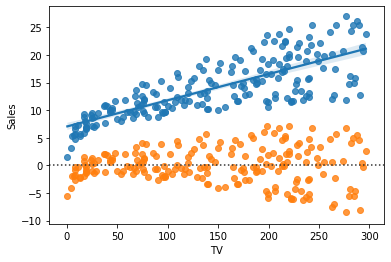

In [61]:
sns.regplot(advertising["TV"],advertising["Sales"])
sns.residplot(advertising["TV"],advertising["Sales"])

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [62]:
# Putting feature variable to X
X = advertising['TV'] #for Dataframe use advertising[['TV']]

# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [63]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Splitting Data into Training and Testing Sets

In [64]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)


In [65]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [66]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np

X_train = X_train[:, np.newaxis] #Alternatively, we can use X_train= np.array(X_train).reshape(-1,1)
X_test = X_test[:, np.newaxis]

print(X_train.ndim)



2


## Performing Linear Regression

In [67]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Coefficients Calculation

In [68]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


$y = 6.989 + 0.0464 \times TV $<br>

Now, let's use this equation to predict our sales.

## Predictions

In [69]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)
lr.predict([[120]])

array([12.56934891])

# Model Validation

#### Computing  mean squared error and R^2 Values

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.97579853285485
r_square_value : 0.5942987267783302


Text(0, 0.5, 'Sales')

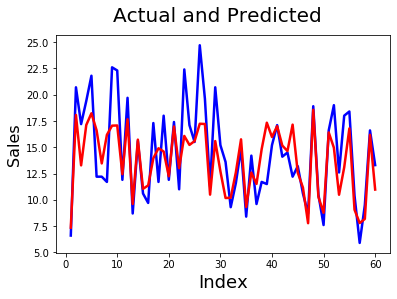

In [71]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

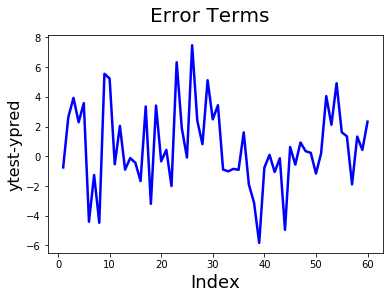

In [72]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'ytest-ypred')

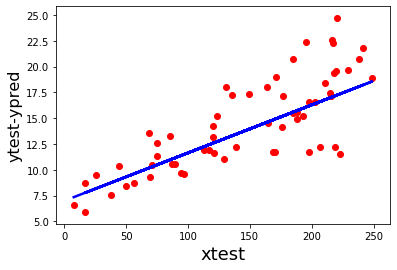

In [73]:
plt.plot(X_test,y_pred, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(X_test,y_test,color="red")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('xtest', fontsize=18)           
plt.ylabel('ytest-ypred', fontsize=16)    